In [2]:
import pandas as pd

In [14]:
df = pd.read_csv("All_INDIA_30.csv")
df['rain'] = df['rain'].replace(-999, 0)
#print(df.head())

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Tmean'] = (df['Tmax'] + df['Tmin']) / 2
print(df.head())

        Date  Latitude  Longitude   Tmin   Tmax  rain   Tmean
0 1990-01-01       9.0       74.0  24.06  32.33   0.0  28.195
1 1990-01-02       9.0       74.0  24.45  32.39   0.0  28.420
2 1990-01-03       9.0       74.0  23.87  32.39   0.0  28.130
3 1990-01-04       9.0       74.0  23.43  32.58   0.0  28.005
4 1990-01-05       9.0       74.0  22.66  32.65   0.0  27.655


In [21]:
print(df['Date'].max())
print(df['Date'].min())

2011-12-31 00:00:00
1990-01-01 00:00:00


In [24]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
grid_avg_tmean = df.groupby(['Latitude', 'Longitude','Month', 'Day'])['Tmean'].mean().reset_index()
grid_avg_tmean.rename(columns={'Tmean': 'Tmean_11yr_avg'}, inplace=True)
grid_avg_tmean = grid_avg_tmean.sort_values(by='Latitude', ascending=False)
print(grid_avg_tmean.head())
grid_avg_tmean.to_csv('grid_11_year_avg_tmean.csv', index=False)

        Latitude  Longitude  Month  Day  Tmean_11yr_avg
128441      36.0       80.0     12    7        6.340000
128391      36.0       80.0     10   18       13.818235
128418      36.0       80.0     11   14        9.387333
128413      36.0       80.0     11    9       10.145313
128376      36.0       80.0     10    3       16.598437


In [38]:
grid_avg_tmean['Date'] = pd.to_datetime(
    '2012-' + grid_avg_tmean['Month'].astype(str).str.zfill(2) + '-' + grid_avg_tmean['Day'].astype(str).str.zfill(2),
    errors='coerce'  # invalid dates will become NaT
)
df_merged = pd.merge(
    df,
    grid_avg_tmean,
    on=['Latitude', 'Longitude', 'Month', 'Day'],
    how='left'
)
df_merged = df_merged.sort_values(by='Latitude', ascending=False)
print(df_merged.head())

            Date_x  Latitude  Longitude   Tmin   Tmax    rain   Tmean  Month  \
2787673 2011-11-01      36.0       80.0   3.65  19.29  0.1104  11.470     11   
2787692 2011-11-28      36.0       80.0  -0.40  17.17  0.0000   8.385     11   
2787637 2011-07-25      36.0       80.0  17.57  26.03  0.1544  21.800      7   
2787682 2011-11-18      36.0       80.0   2.86  19.17  0.0000  11.015     11   
2787693 2011-11-29      36.0       80.0  -1.82  16.66  0.0000   7.420     11   

         Day  Tmean_11yr_avg     Date_y  
2787673    1       11.767333 2012-11-01  
2787692   28        7.278235 2012-11-28  
2787637   25       22.166562 2012-07-25  
2787682   18        9.038667 2012-11-18  
2787693   29        7.075294 2012-11-29  


In [41]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df_merged = pd.merge(df, grid_avg_tmean, on=['Latitude', 'Longitude', 'Month', 'Day'], how='left')
df_merged.rename(columns={'Date_x': 'Date', 'Date_y': 'Climatology_Date'}, inplace=True)
print(df_merged.head())
#df_merged.to_csv('All_tmean_normals.csv', index=False)

        Date  Latitude  Longitude   Tmin   Tmax  rain   Tmean  Month  Day  \
0 1990-01-01       9.0       74.0  24.06  32.33   0.0  28.195      1    1   
1 1990-01-02       9.0       74.0  24.45  32.39   0.0  28.420      1    2   
2 1990-01-03       9.0       74.0  23.87  32.39   0.0  28.130      1    3   
3 1990-01-04       9.0       74.0  23.43  32.58   0.0  28.005      1    4   
4 1990-01-05       9.0       74.0  22.66  32.65   0.0  27.655      1    5   

   Tmean_11yr_avg Climatology_Date  
0       27.383409       2012-01-01  
1       27.310682       2012-01-02  
2       27.320909       2012-01-03  
3       27.275455       2012-01-04  
4       27.351136       2012-01-05  


In [47]:
import matplotlib.pyplot as plt

In [50]:
import seaborn as sns

In [52]:
df = df_merged.copy()

In [61]:
print(df.head())
print(df['Tmean_11yr_avg'].max())
print(df['Tmean_11yr_avg'].min())
print(df['Tmax'].min())
print(df['Tmax'].max())
print(df['Tmin'].min())
print(df['Tmin'].max())

        Date  Latitude  Longitude   Tmin   Tmax  rain   Tmean  Month  Day  \
0 1990-01-01       9.0       74.0  24.06  32.33   0.0  28.195      1    1   
1 1990-01-02       9.0       74.0  24.45  32.39   0.0  28.420      1    2   
2 1990-01-03       9.0       74.0  23.87  32.39   0.0  28.130      1    3   
3 1990-01-04       9.0       74.0  23.43  32.58   0.0  28.005      1    4   
4 1990-01-05       9.0       74.0  22.66  32.65   0.0  27.655      1    5   

   Tmean_11yr_avg Climatology_Date  
0       27.383409       2012-01-01  
1       27.310682       2012-01-02  
2       27.320909       2012-01-03  
3       27.275455       2012-01-04  
4       27.351136       2012-01-05  
35.51681818181818
2.262647058823529
0.94
47.61
-9.03
33.39


In [65]:
df['Heatwave'] = df['Tmax'] - df['Tmean_11yr_avg'] >= 4.5

df_heatwaves = df[df['Heatwave']]
df_heatwaves['Date'] = pd.to_datetime(df_heatwaves['Date'], format='%Y-%m-%d')
df_heatwaves['Year'] = df_heatwaves['Date'].dt.year
heatwave_counts = df_heatwaves.groupby('Year').size()

print(heatwave_counts)

Year
1990     77445
1991     89715
1992     89867
1993     90613
1994     85929
1995     90207
1996     88854
1997     79603
1998     90311
1999     85726
2000     88140
2001     88901
2002     96554
2003     87970
2004     89694
2005     91470
2006     92284
2007     93939
2008     87170
2009    103278
2010     97019
2011     92717
dtype: int64


/tmp/ipykernel_7438/3819983191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatwaves['Date'] = pd.to_datetime(df_heatwaves['Date'], format='%Y-%m-%d')
/tmp/ipykernel_7438/3819983191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatwaves['Year'] = df_heatwaves['Date'].dt.year


In [70]:
import numpy as np

In [72]:
df['Tmax_TmeanDiff_MarToJun'] = np.nan

# Apply condition using boolean mask
mask = (df['Month'].isin([3, 4, 5, 6])) & ((df['Tmax'] - df['Tmean_11yr_avg']) > 4.5)

# Assign values only where the condition is True
df.loc[mask, 'Tmax_TmeanDiff_MarToJun'] = df['Tmax'] - df['Tmean_11yr_avg']
df['Tmax_TmeanDiff_MarToJun'].fillna(0, inplace=True)

# Check the result
print(df.head(30))

         Date  Latitude  Longitude   Tmin   Tmax  rain   Tmean  Month  Day  \
0  1990-01-01       9.0       74.0  24.06  32.33   0.0  28.195      1    1   
1  1990-01-02       9.0       74.0  24.45  32.39   0.0  28.420      1    2   
2  1990-01-03       9.0       74.0  23.87  32.39   0.0  28.130      1    3   
3  1990-01-04       9.0       74.0  23.43  32.58   0.0  28.005      1    4   
4  1990-01-05       9.0       74.0  22.66  32.65   0.0  27.655      1    5   
5  1990-01-06       9.0       74.0  23.15  31.96   0.0  27.555      1    6   
6  1990-01-07       9.0       74.0  23.25  29.79   0.0  26.520      1    7   
7  1990-01-08       9.0       74.0  23.19  29.51   0.0  26.350      1    8   
8  1990-01-09       9.0       74.0  23.11  30.94   0.0  27.025      1    9   
9  1990-01-10       9.0       74.0  23.52  32.22   0.0  27.870      1   10   
10 1990-01-11       9.0       74.0  22.89  32.41   0.0  27.650      1   11   
11 1990-01-12       9.0       74.0  22.72  31.90   0.0  27.310  

/tmp/ipykernel_7438/4064346154.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tmax_TmeanDiff_MarToJun'].fillna(0, inplace=True)


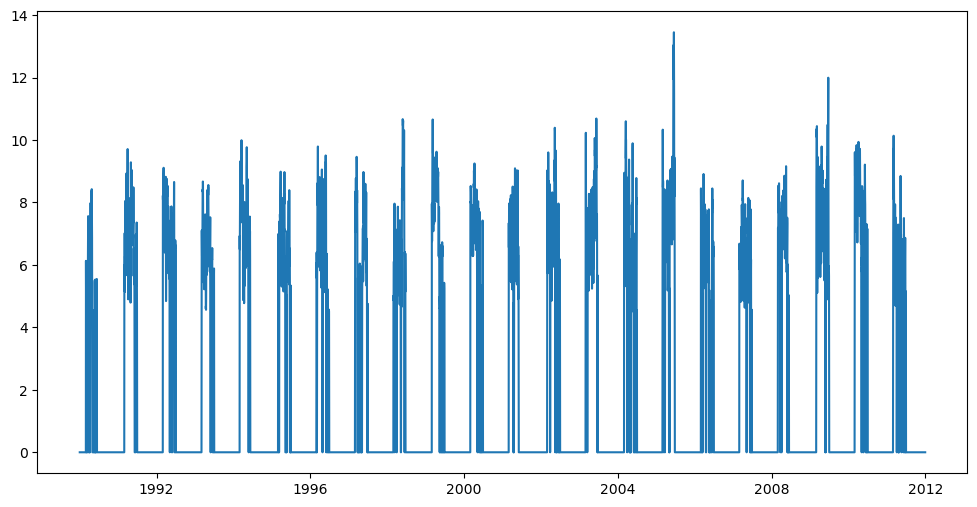

In [75]:
lat = 21.0
lon = 85.0

# Filter data for that grid and months March–June
df_grid = df[(df['Latitude'] == lat) & (df['Longitude'] == lon)].copy()
plt.figure(figsize=(12, 6))
plt.plot(df_grid['Date'], df_grid['Tmax_TmeanDiff_MarToJun'])
plt.show()

In [78]:
import altair as alt

In [81]:
!pip install geopandas

In [84]:
import geopandas as gpd

india_map = gpd.read_file('IND.geojson')
#print(india_map.head(200))

In [87]:
import json

In [90]:
from scipy.interpolate import griddata

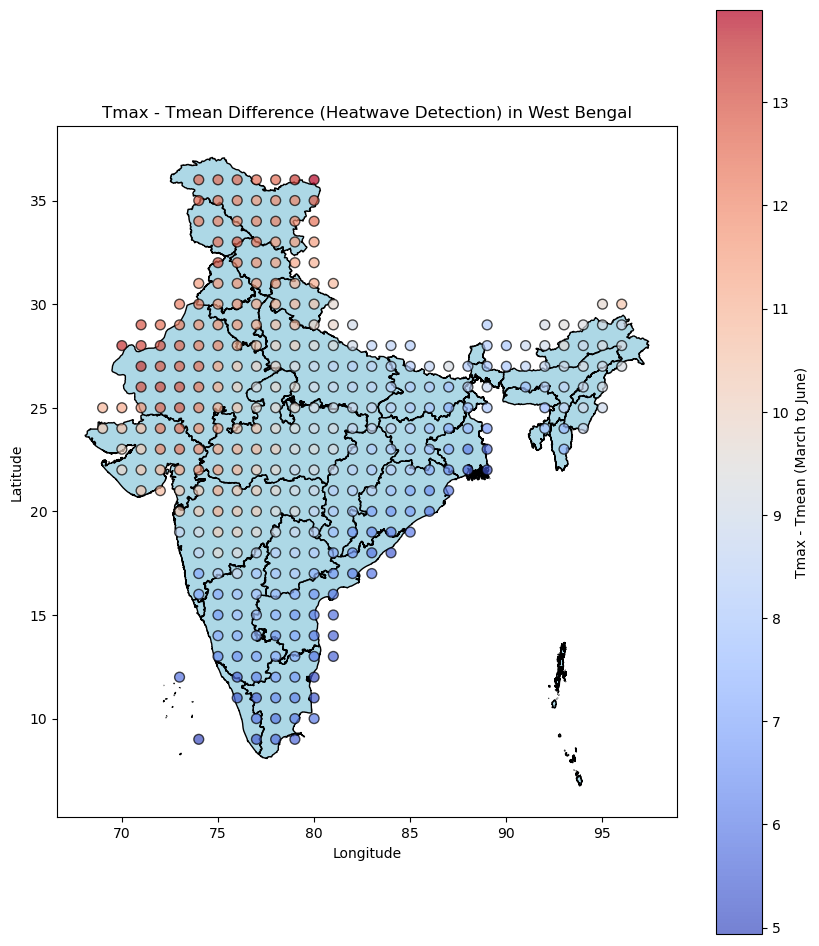

In [93]:
specific_day = '2011-03-15'
df_single_day = df[df['Date'] == specific_day]

fig, ax = plt.subplots(figsize=(10, 12))
india_map.plot(ax=ax, color='lightblue', edgecolor='black')

scatter = ax.scatter(
    df_single_day['Longitude'], df_single_day['Latitude'], 
    c=df_single_day['Tmax_TmeanDiff_MarToJun'], 
    cmap='coolwarm', s=50, edgecolor='k', alpha=0.7
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Tmax - Tmean (March to June)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Tmax - Tmean Difference (Heatwave Detection) in West Bengal')

# Show the plot
plt.show()

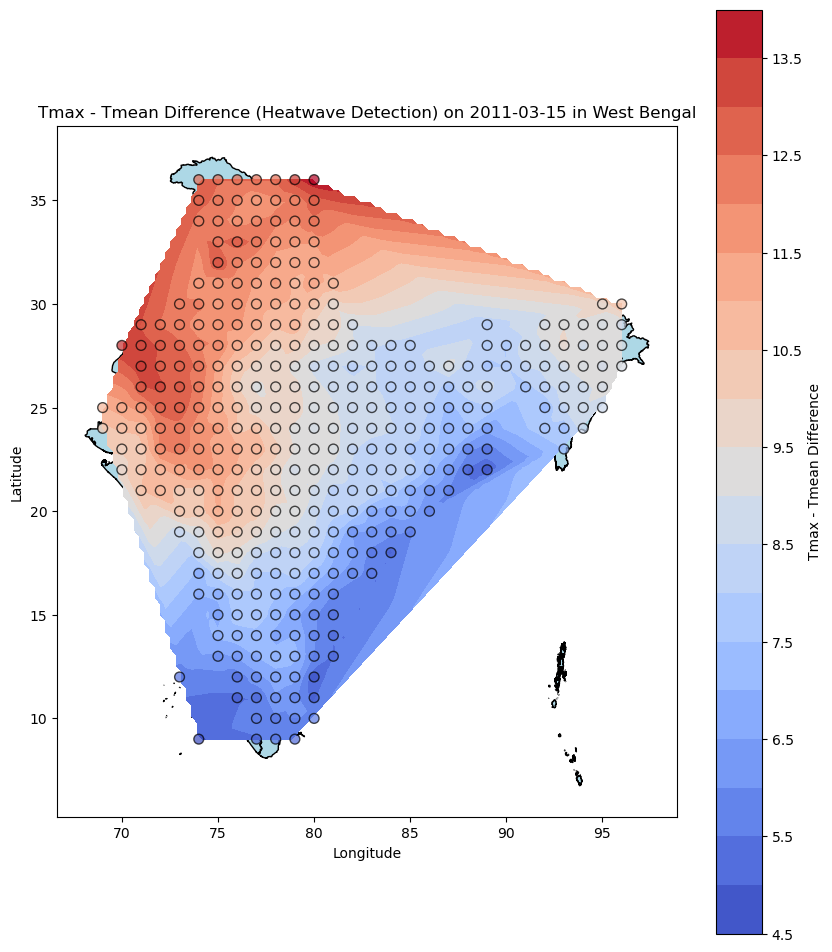

In [96]:
specific_day = '2011-03-15'
df_single_day = df[df['Date'] == specific_day]
grid_lon, grid_lat = np.meshgrid(
    np.linspace(df_single_day['Longitude'].min(), df_single_day['Longitude'].max(), 100),  # 100 points along Longitude
    np.linspace(df_single_day['Latitude'].min(), df_single_day['Latitude'].max(), 100)  # 100 points along Latitude
)
points = df_single_day[['Longitude', 'Latitude']].values
values = df_single_day['Tmax_TmeanDiff_MarToJun'].values
grid_values = griddata(points, values, (grid_lon, grid_lat), method='linear')
fig, ax = plt.subplots(figsize=(10, 12))
india_map.plot(ax=ax, color='lightblue', edgecolor='black')

# Create a contour plot for the interpolated data
contour = ax.contourf(grid_lon, grid_lat, grid_values, cmap='coolwarm', levels=20)

# Add colorbar
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Tmax - Tmean Difference')

# Scatter the original grid points on top of the contour plot
scatter = ax.scatter(
    df_single_day['Longitude'], df_single_day['Latitude'], 
    c=df_single_day['Tmax_TmeanDiff_MarToJun'], 
    cmap='coolwarm', s=50, edgecolor='k', alpha=0.7
)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Tmax - Tmean Difference (Heatwave Detection) on {specific_day} in West Bengal')

# Show the plot
plt.show()

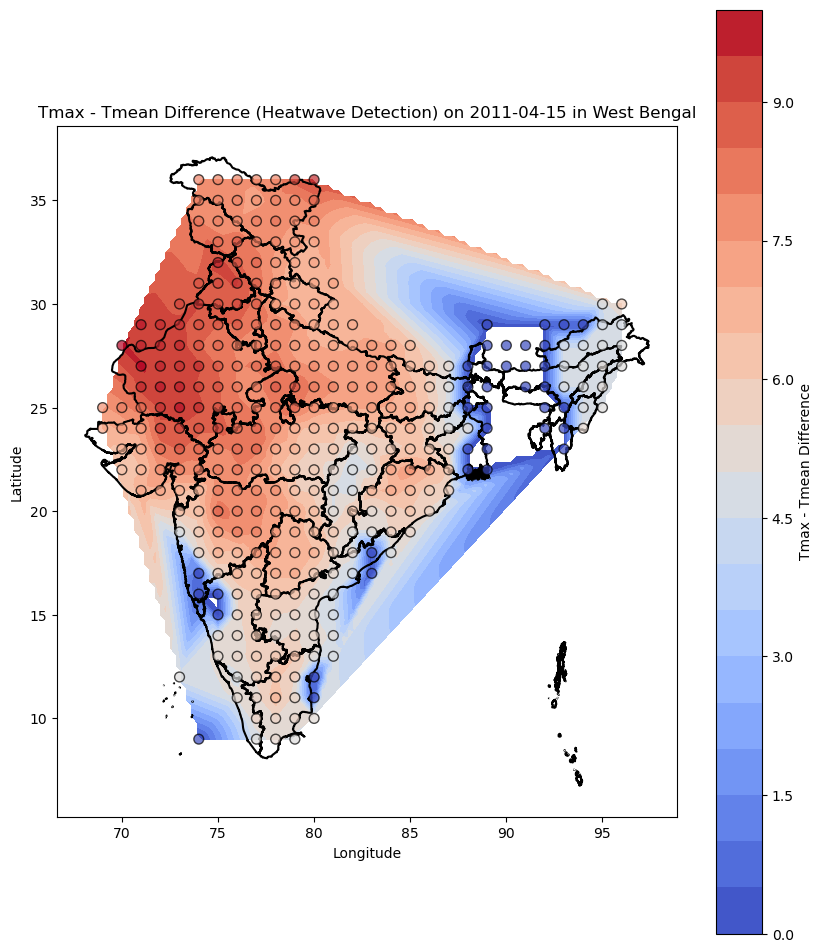

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import geopandas as gpd

specific_day = '2011-04-15'
df_single_day = df[df['Date'] == specific_day]

grid_lon, grid_lat = np.meshgrid(
    np.linspace(df_single_day['Longitude'].min(), df_single_day['Longitude'].max(), 100),  # 100 points along Longitude
    np.linspace(df_single_day['Latitude'].min(), df_single_day['Latitude'].max(), 100)  # 100 points along Latitude
)
points = df_single_day[['Longitude', 'Latitude']].values
values = df_single_day['Tmax_TmeanDiff_MarToJun'].values
grid_values = griddata(points, values, (grid_lon, grid_lat), method='linear')

fig, ax = plt.subplots(figsize=(10, 12))
contour = ax.contourf(grid_lon, grid_lat, grid_values, cmap='coolwarm', levels=20)
india_map.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)

cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Tmax - Tmean Difference')
scatter = ax.scatter(
    df_single_day['Longitude'], df_single_day['Latitude'], 
    c=df_single_day['Tmax_TmeanDiff_MarToJun'], 
    cmap='coolwarm', s=50, edgecolor='k', alpha=0.7
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Tmax - Tmean Difference (Heatwave Detection) on {specific_day} in West Bengal')

plt.show()


In [115]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from matplotlib.colors import LinearSegmentedColormap

# Create custom colormap: white -> light red -> red -> deep red
custom_cmap = LinearSegmentedColormap.from_list("custom_red", ["white", "lightcoral", "red", "darkred"])

# Create folder if not exists
output_folder = '2012_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# GLOBAL vmin and vmax from entire data, not just May 2012
vmin = df['Tmax_TmeanDiff_MarToJun'].min()
vmax = df['Tmax_TmeanDiff_MarToJun'].max()

# Filter for 2011 (probably meant 2012 from folder name?)
df_may_2012 = df[(df['Date'].dt.year == 2011)]

# Create interpolation grid
grid_lon, grid_lat = np.meshgrid(
    np.linspace(df['Longitude'].min(), df['Longitude'].max(), 100),
    np.linspace(df['Latitude'].min(), df['Latitude'].max(), 100)
)

# Loop through each day
for specific_day in df_may_2012['Date'].unique():
    df_single_day = df_may_2012[df_may_2012['Date'] == specific_day]
    
    points = df_single_day[['Longitude', 'Latitude']].values
    values = df_single_day['Tmax_TmeanDiff_MarToJun'].values
    grid_values = griddata(points, values, (grid_lon, grid_lat), method='linear')
    
    fig, ax = plt.subplots(figsize=(10, 12))
    
    contour = ax.contourf(grid_lon, grid_lat, grid_values, cmap=custom_cmap, levels=20, vmin=vmin, vmax=vmax)

    
    india_map.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
    
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Tmax - Tmean Difference')
    
    ax.scatter(
     df_single_day['Longitude'], df_single_day['Latitude'],
     c=df_single_day['Tmax_TmeanDiff_MarToJun'],
     cmap=custom_cmap, s=50, edgecolor='k', alpha=0.7, vmin=vmin, vmax=vmax
   )

    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Tmax - Tmean Difference (Heatwave Detection) on {specific_day.date()} in West Bengal')
    
    image_filename = f"{output_folder}/heatwave_{specific_day.date()}.png"
    plt.savefig(image_filename)
    plt.close(fig)

print(f"All images saved in '{output_folder}' with a global color scale.")

All images saved in '2012_plots' with a global color scale.


In [117]:
import imageio.v2 as imageio
import os

folder = '2012_plots'
png_files = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
images = []

for file in png_files:
    img_path = os.path.join(folder, file)
    images.append(imageio.imread(img_path))

# Save as GIF
output_gif = os.path.join(folder, 'heatwave_animation.gif')
imageio.mimsave(output_gif, images, duration=1.0)  # duration per frame in seconds

print(f"Saved animated GIF: {output_gif}")


Saved animated GIF: 2012_plots/heatwave_animation.gif


In [125]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 1.1 MB/s eta 0:00:0000:0100:020m


In [128]:
import cv2
import os

folder = '2012_plots'
png_files = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
frame = cv2.imread(os.path.join(folder, png_files[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(os.path.join(folder, 'heatwave_video.mp4'), cv2.VideoWriter_fourcc(*'mp4v'), 1, (width, height))

for file in png_files:
    video.write(cv2.imread(os.path.join(folder, file)))

video.release()
print("Video saved successfully.")


Video saved successfully.
